- 지난 세션에서 기술 통계 기초를 다뤘습니다.
- 이번 세션에서는 '표와 그래프를 통한 기술 통계'(데이터 시각화)를 EDA와 함께 배워보겠습니다!

# Intro to EDA

## 데이터 분석의 이해 

<a href='https://ifh.cc/v-dlqavp' target='_blank'><img src='https://ifh.cc/g/dlqavp.png' border='0'></a>

위 표처럼, 데이터 분석은 분석의 대상 및 방법에 따라 4가지 유형으로 나누어집니다.  
1. __Optimization__: 해결해야 할 문제를 알고, 분석 방법도 알고 있는 경우  
2. __Solution__: 해결해야 할 문제는 알고 있지만, 분석 방법을 모르는 경우  
3. __Insight__: 기존의 분석 방법은 알고 있지만, 대상이 명확하게 무엇인지 모르는 경우  
4. __Discovery__: 분석 대상과 분석 방법을 모두 모르는 경우

저희는 지금까지 분석 방법의 기초(분석을 위한 도구)를 아주 조금 배우고 경험해보았다고 할 수 있습니다.<br>
또 앞으로 스터디 세션과 프로젝트를 통해 분석의 방법은 더욱 깊이 있게 다룰 예정입니다. 오늘 저희가 다루고자 하는 부분은 `분석의 대상` 입니다.

데이터 분석에서 가장 중요한 부분은 무엇일까요? 

__바로 통찰(Insight)의 발견입니다.__ 그런데 만약 내가 무엇을 분석해야 하는지 이미 알고 있는 시점이라면, 그 때는 최적화(Optimization)가 가장 중요하다고 할 수 있습니다. 최적화는 통찰이 발견된 이후, 머신러닝 등의 분석 방법을 어느정도 알고 있을때 진행됩니다. 따라서 최적화를 배우기 이전에 *저희는 먼저 통찰을 얻는 방법을 배우고자 합니다.*
***

>데이터 수집-> 시각화탐색 -> 패턴도출 -> 인사이트 발견

## EDA란?

INSIGHT는 *EDA* 를 통해서 얻을 수 있습니다.

__EDA(Exploratory Data Analysis, 탐색적 데이터 분석)란,__ 데이터의 특징과 내재하는 구조적인 관계를 알아내기 위한 분석 기법입니다.<br>
쉽게 말하자면, __수집한 데이터를 다양한 각도에서 관찰하고 이해하는 과정이라고 할 수 있습니다.__ <br>
EDA 과정에서는 데이터를 보다 직관적으로 바라보기 위해 *통계적인 방법과 데이터 시각화* 가 사용됩니다.

이러한 EDA를 통해 저희는 수집한 데이터를 이해하고 특성을 파악할 수 있으며, 문제에 대한 통찰(Insight)을 얻을 수 있습니다.<br>
또한, 이렇게 얻은 통찰을 바탕으로 *향후 분석의 방향* 을 설정하게 됩니다.

데이터 분석 과정의 첫 부분을 담당하는 EDA 과정에서 데이터 자체를 잘못 해석하고, 문제를 올바르게 파악하지 못한다면<br>
향후 분석과 최적화 과정에서 큰 난향을 겪게 됩니다. 따라서 __EDA는 매우 매우 중요하다고 할 수 있습니다.__ 
***

오늘은 가장 기본적인 __Tabular data 유형의 Binary Classification 문제인 "Titanic"__를 활용해 학습하겠습니다.<br>
Titanic은 데이터 분석의 입문서 같은 캐글 대회인데요. 그만큼 기본적인 데이터 분석을 다루기엔 좋은 실습 자료인 것 같아 선정했습니다.

이 노트북의 EDA 순서는 다음과 같습니다.

1. 데이터 및 결측치 확인


2. Feature 분석 및 시각화
    - 데이터 유형에 따라 다양한 시각화 방식 사용
    - 결측치 처리
    
    

3. Feature Engineering과 Data Cleaning
    - (얻은 insight로 새로운 feature를 만들기
    - machine learning을 위한 cleaning)

# 데이터 및 결측치 확인

## 라이브러리 및 파일 불러오기 

In [1]:
# 필요한 라이브러리 불러오기
# 데이터 핸들링을 위한 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # matplotlib style 설정

# 문법 변경에 의한 경고를 무시
import warnings

warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline

In [5]:
# 데이터 불러오기
data = pd.read_csv('./data/train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>변수설명 : https://dacon.io/competitions/open/235539/data

## 데이터 설명 Data Description

| Column | 설명 |  |
| --- | --- | --- |
| PassengerId | 탑승객의 고유 아이디 |  |
| Survival | 생존여부 | (0: 사망, 1: 생존) |
| Pclass | 등실의 등급 | (1: 1등급, 2: 2등급, 3: 3등급) |
| Name | 이름 |  |
| Sex | 성별 |  |
| Age | 나이 |  |
| Sibsp | 함께 탑승한 형제자매, 아내 남편의 수 |  |
| Parch | 함께 탑승한 부모, 자식의 수 |  |
| Ticket | 티켓번호 |  |
| Fare | 티켓의 요금 |  |
| Cabin | 객실번호 |  |
| Embarked | 배에 탑승한 위치 | (C = Cherbourg, Q = Queenstown, S = Southampton) |


## 결측치 확인 

In [14]:
data.isnull().sum() #결측값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 데이터 분석을 본격적으로 들어가기 전에, __반드시 데이터에 결측치(null)가 있는지 확인하고__, 있다면 처리를 해 주어야 합니다.
- 이 데이터 셋에는 __Age, Cabin, Embarked__에 결측치가 존재합니다. __이 결측치들에 대해선 각각의 feature들을 살펴보면서__ 처리하도록 하겠습니다.
***

# Feature 분석 및 시각화
    - 데이터 유형에 따라 다양한 시각화 방식 사용
    - 결측치 처리

- 시각화를 통해, 많은 양의 데이터를 효과적으로 확인할 수 있음 (infographics)
- 요약 통계보다 더 정확한 데이터 분석 결과 도출 가능 

분류| 내용 
---|---|
명목형 자료 | Bar plot(막대그래프), Count plot, Pie chart
자료 개형 | Histogram, Box plot(박스 그림), Stem and leaf plot(줄기 - 잎 그래프)
시계열 및 변수 간 관계 | Time series plot(시계열 그래프), Scatter plot(산점도) 

## Feature의 종류

__Categorical Features(범주형,명목형):__
- 범주형 데이터는 ‘A’, ‘B’, ‘C’와 같이 종류를 표시하는 데이터를 말합니다.
- __범주형 데이터 중에서 명목형 데이터에는 순서가 없습니다.__
- __Categorical Features in the dataset: Sex, Embarked__
***
__Ordinal Features(순서형):__
- 범주형 데이터 중에서 순서를 가지는 데이터를 말합니다. 
- 예를 들어, __Height__이라는 feature가 __Tall, Medium, Short__라는 값을 갖는다면 순서형 데이터가 됩니다.
- __Ordinal Features in the dataset: PClass__
***
__Continuous Feature(연속형):__
- 연속형 데이터는 말 그대로 연속적인 값을 갖는 데이터입니다.
- __Continuous Features in the dataset: Age__
***

## 시각화 기본 표현
Figure: 그래프를 그리는 바탕, 도화지
- Figure를 그린 후 plt.subplots로 바탕을 분할하려 각 부분에 그래프를 그리는 방식
- plt.figure를 직접적으로 적어주는 것이 확실하지만, 적지 않아도 자동으로 생성
- 현재 figure: plt.gcf()

Size 조절: fig.set_size_inches(18.5, 10.5)
- 또는 plt.figure(figsize=(10,5))
- 또는 plt.rcParams['figure.figsize'] = (10,7)

Axes: plot이 그려지는 공간

Axis: plot의 축

<a href='https://ifh.cc/v-8FO8JJ' target='_blank'><img src='https://ifh.cc/g/8FO8JJ.png' border='0'></a>

Text(0.5, 1.0, 'number6')

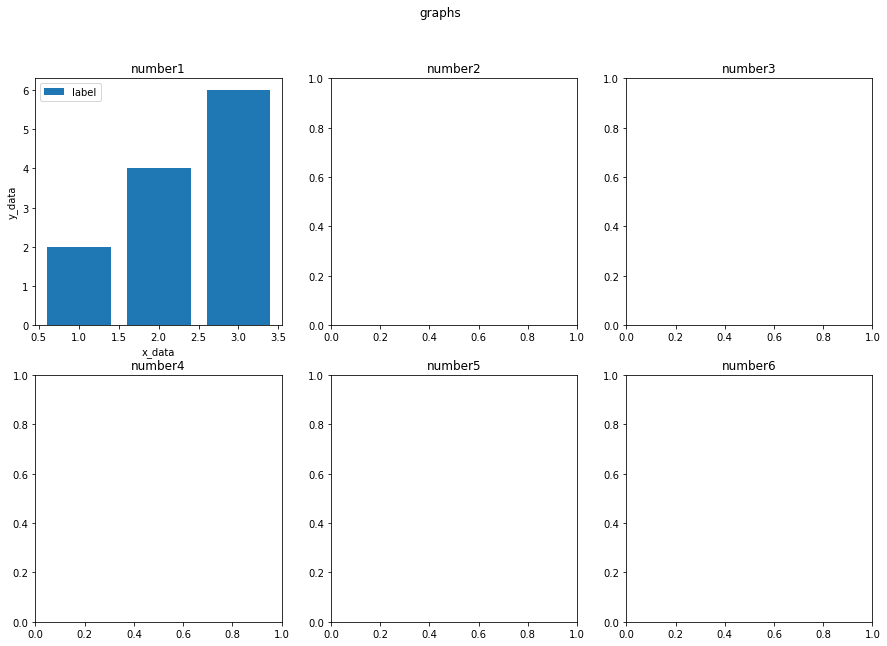

In [14]:
# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

x=[1,2,3] #리스트로 표현
y=[2,4,6]
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('graphs')

#Plt.subplot(m,n,i) 은 m행, n열, i번째 

#첫번째 그래프
ax[0,0].bar(x, y, label='label')
ax[0,0].set_title('number1')
ax[0,0].legend() #범례설정
ax[0,0].set(xlabel='x_data',ylabel='y_data')

#두번째그래프
ax[0,1].set_title('number2')

#세번째그래프
ax[0,2].set_title('number3')

#네번째그래프
ax[1,0].set_title('number4')

#세번째그래프
ax[1,1].set_title('number5')

#세번째그래프
ax[1,2].set_title('number6')

<Figure size 432x288 with 0 Axes>

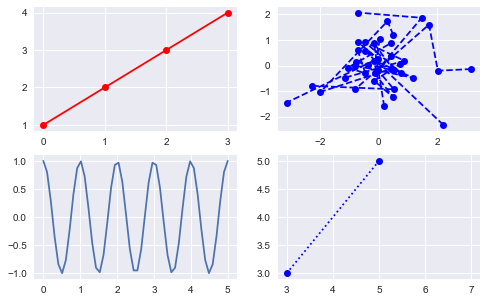

In [15]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

# 시각화 스타일 설정

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [16]:
#그래프 서식 설정하기

parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

## 피처별 시각화 및 결측값 채우기

### 생존자 수 (PieChart/CountPlot)

1. 여러개의 그래프 그리기: matplotlib.pyplot 모듈의 subplot() 함수
    - 기본사용: plt.subplot(row, column, index) 
2. Pie Chart
    - explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
    - autopct: 부채꼴 안에 표시될 숫자의 형식
    - shadow: 그림자
    <br>
3. Count Plot
    - 항목별 개수를 세어줌
    - 해당 column을 구성하고 있는 value들을 구분하여 보여줌

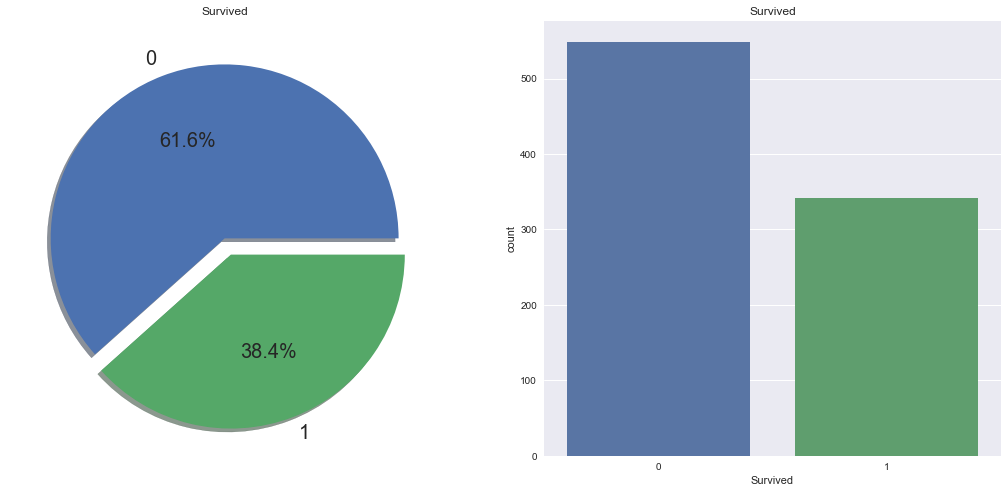

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#파이차트
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], ## Survived 0은 중심에서 0%먼큼, 1은 중심에서 10%만큼 벗어나게
                                         autopct='%1.1f%%',## 백분율을 소수점 앞 한자리 소수점 아래 한자리까지 %로 표시
                                         ax=ax[0],## 0번째 위치
                                         shadow=True,
                                         fontsize=20)
ax[0].set_title('Survived') #제목설정
ax[0].set_ylabel('')

#카운트플랏
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 살아남지 못한 승객의 수가 살아남은 승객의 수보다 많습니다.

- 총 891명의 승객들 중, 오직 350명(38.4%)만이 살아남았습니다.

- 더 많은 인사이트를 얻기 위해 어떤 특성을 가진 승객들이 살아남았고, 살아남지 못했는지 확인할 필요가 있습니다.

- 데이터 셋의 feature들을 하나씩 분석해보며 이를 확인해보겠습니다.
- __그전에 먼저 타이타닉 데이터 안에 있는feature들의 서로 다른 데이터 타입을 이해해야 합니다.__
***

### 생존자 성별 (Bar/CountPlot)

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

1. Bar Plot (가로형)
    - bar (세로형)
    - barh (가로형) ('h'orizontal, 수평의)
    <br>
2. Count Plot
    - x, y: 데이터의 변수명을 갖는 파라미터
    - hue: (optional) 색깔 인코딩을 위해 컬럼명을 갖는 파라미터
    - data: (optional) 그래프로 나타내기 위한 데이터셋

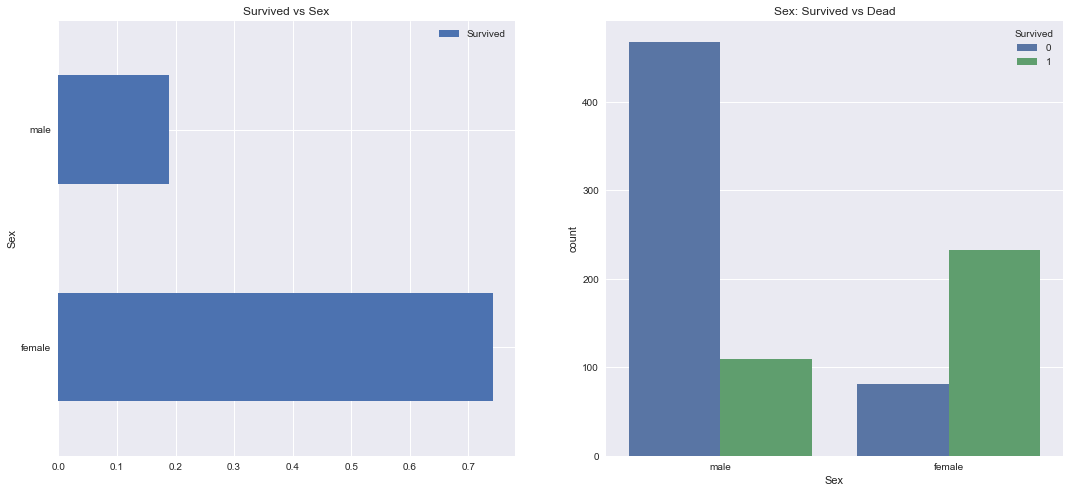

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 막대 그래프
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0]) ## sex별 탑승객 수를 수평 막대그래프로
ax[0].set_title('Survived vs Sex') ## 그래프 위치설정, 0번째 row, 0번쨰 col

# 카운트 플랏
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
## sex내에서 Survived 여부를 나눠서 plot
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 탑승객의 수는 남자가 여자보다 훨씬 많습니다.
- 하지만, 생존한 수는 여자 승객이 남자 승객보다 거의 두 배만큼 많습니다.
- 여자의 생존율은 약 75%인 반면, 남자는 18-19% 입니다.
- 이러한 점은 모델링할 시 중요하게 작용할 것 같습니다.
***

### Pclass: Ordinal Feature (Box/Bar/Count/FactorPlot)

1. Cross-tabulation 
    - 카테고리 데이터의 수치를 확인하기에 편리함
2. Box Plot
    - 분포 확인에 유용함

In [20]:
#크로스태블릿
pd.crosstab(data.Pclass,
            data.Survived, margins=True).style.background_gradient(
                cmap='summer_r')  # margins=True => All 출력

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


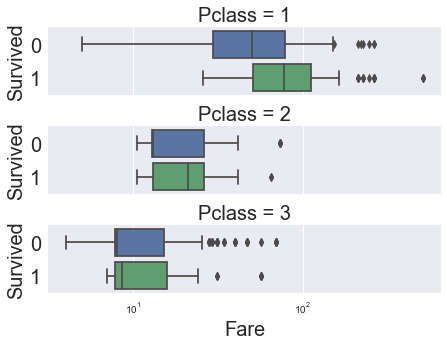

In [21]:
plot = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,## box plot을 수평적으로
                data=data.query("Fare > 0")) ## 요금이 0초과인 데이터만 #query 특정조건추출데이터
plot.set(xscale="log"); 

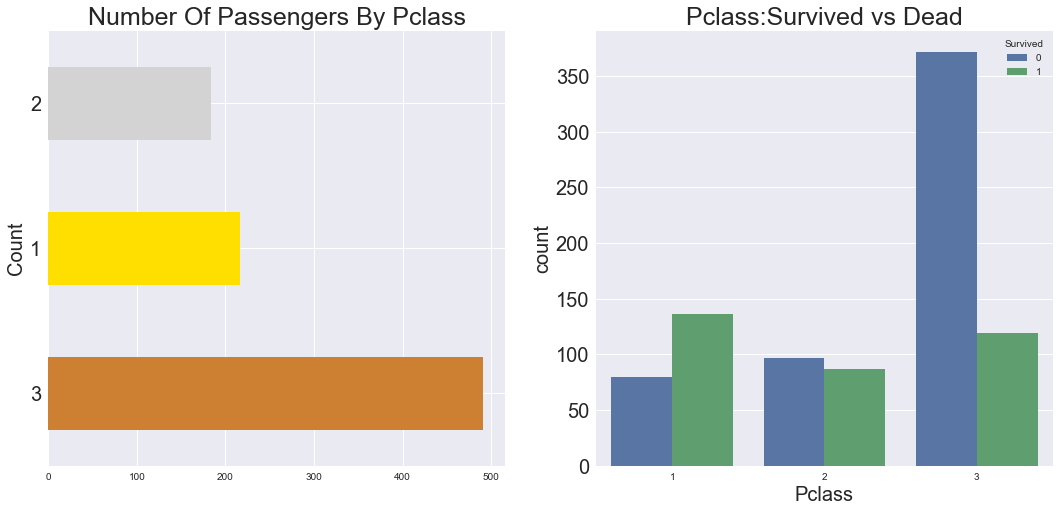

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 가로형 막대 그래프: barh
data['Pclass'].value_counts().plot.barh(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) ## Pclass별 탑승객 수, color 지정
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# 카운트 플랏
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])## Pclass별 Survived를 나눠 plot
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Pclass 1의 승객들이 다른 Pclass의 승객들보다 구조에 있어 우선순위를 가졌음을 확인할 수 있습니다.
- Pclass 3에 가장 많은 탑승객이 있었지만, 그에 비해 생존자들의 수는 매우 적었습니다(약 25% 정도).
- Pclass 1의 생존율은 63%이며 Pclass 2의 생존율을 48%입니다.
- __Sex 와 Pclass__를 함께 살펴보겠습니다.


In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

2. Factor Plot
    - x: Pclass
    - y: Survived
    - hue: Sex
    - data: data

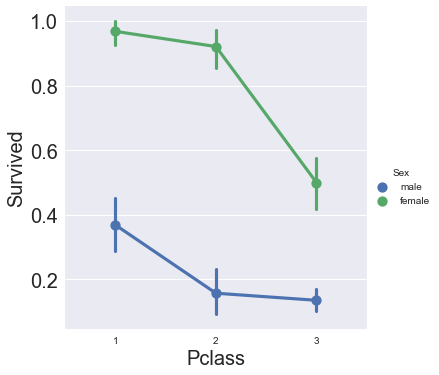

In [24]:
#팩터플랏

sns.factorplot('Pclass', 'Survived', hue='Sex', data=data) ## sex별로 pclass의 변화에 따른 survived 변화
plt.show()

- 이번에는 __FactorPlot__을 사용하였습니다. FactorPlot은 범주형 변수들을 분리하여 표현하기에 용이합니다.
- __CrossTab__과 __FactorPlot__을 보면, Pclass 1의 여자 승객 생존율이 95-96%로 매우 높은 것을 확인할 수 있습니다.
- 이는 Pclass와 무관하게, 여자는 구조에 있어 우선순위가 높다는 것을 알 수 있습니다. (Pclass 1의 남자 승객은 매우 낮은 생존율을 보입니다.)
***

### Age: Continuous Feature (Violint/FactorPlot/Histogram)

In [25]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years') #최댓값
print('Youngest Passenger was of:', data['Age'].min(), 'Years') #최솟값
print('Average Age on the ship:', data['Age'].mean(), 'Years') #평균

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


1. Violin Plot
    - x
    - y
    - hue
    - 카테고리별 분포를 동시에 확인하기 좋음

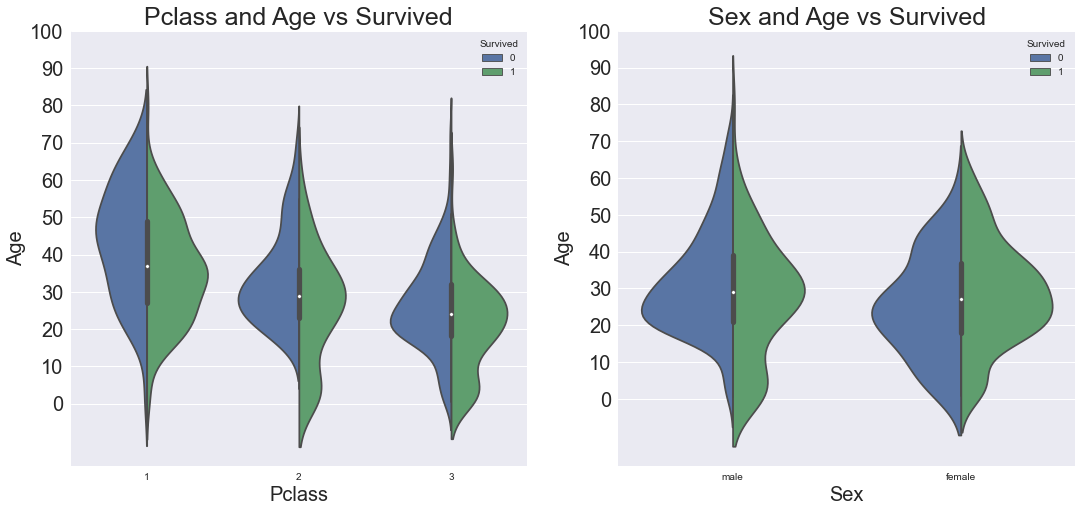

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#바이올린 플랏
sns.violinplot('Pclass',
               'Age',
               hue='Survived',
               data=data,
               split=True, ## hue에 맞춰서, 그래프가 겹치지 않게 분리해줌
               ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

#바이올린 플랏
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- Pclass가 증가할수록, 아이들의 수 역시 증가하며, 10살 이하 승객들의 생존율은 Pclass와 상관없이 높습니다.
- Pclass 1에서는 20-50살 승객들의 생존율이 높습니다.
- 남자들은 나이가 많을수록 생존율이 떨어짐을 확인할 수 있습니다.

- 이전에 확인했듯이, Age feature에는 __177개의 결측치__가 존재합니다.
- 이 결측치를 데이터 셋의 평균 나이로 대체할 수도 있지만, 평균 나이로 대체하기엔 사람들의 나이대가 매우 다양하다는 문제가 있습니다. 결측치를 처리할 다른 방법은 없을까요?
- __Name__ feature를 활용하는 방법이 있습니다!
- 이름에는 Mr 또는 Mrs와 같은 salutation이 존재합니다. 따라서 Mr와 Mrs 그룹 각각의 평균값을 활용해볼 수 있을 것 같습니다.
- __"What is in a Name?"__ -> new Feature

In [27]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  # salutation 추출

- __.(dot)__을 기준으로 __A-Z 또는 a-z__ 사이의 문자열을 추출합니다.

In [28]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(
    cmap='summer_r')  # Initials을 Sex와 함께 확인

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- Mlle와 Mme같은 misspellled initials들이 보입니다. 이를 Miss 또는 유추 가능한 값들로 대체하겠습니다.

In [29]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'
], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'
],
                        inplace=True)

In [30]:
data.groupby('Initial')['Age'].mean()  # Initial별 평균 나이 확인

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### age 결측값 채우기

In [31]:
# 결측값을 Initial별 평균값으로 대체
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [32]:
# 결측값 유무 확인
data.Age.isnull().any()

False

1. Histogram
    - bins: 가로축 구간의 개수
    - edgecolor: 막대 테두리 색
    - color: 막대 색

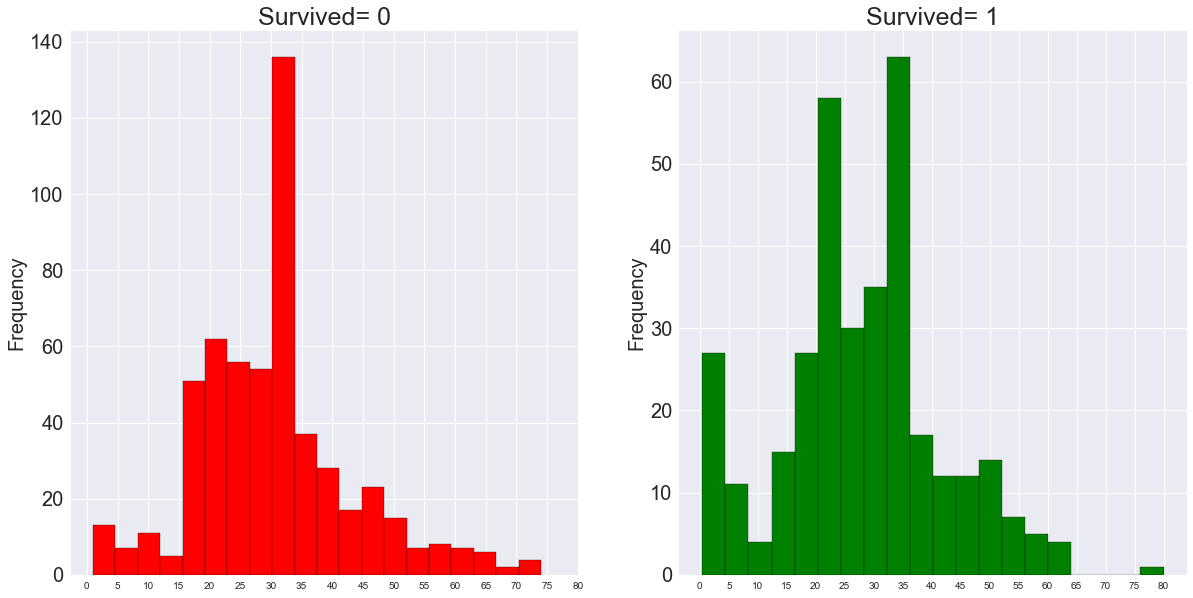

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

#히스토그램

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],
                                          bins=20,
                                          edgecolor='black',
                                          color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# 히스토그램

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],
                                          color='green',
                                          bins=20,
                                          edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

- 5살 아래의 아기들은 많은 수가 구조를 받았습니다. (The Women and Child First Policy)
- 구조된 사람들 중 나이가 가장 많은 사람은 80살입니다.
- 가장 많은 사람이 죽은 나이대는 30-40살입니다.

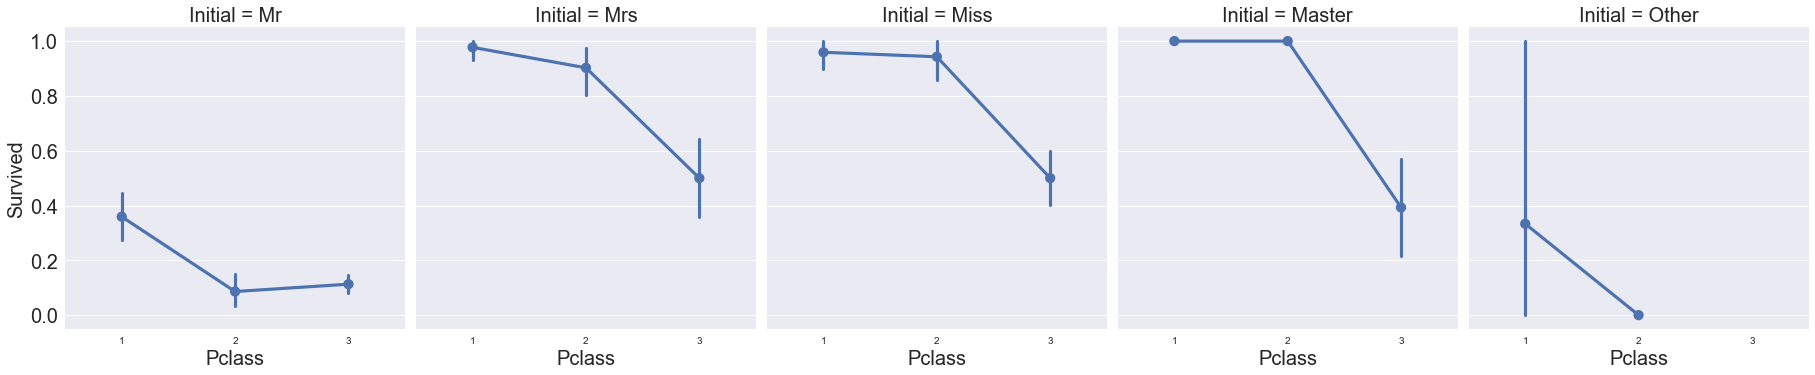

In [34]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)## Initial별 pclass, survived plot
plt.show()

- The Women and Child First Policy는 사실!
***

### Embarked: Categorical Value (Factor/CountPlot)

- cross tab : 각 범주형 데이터의 개수를 열과 행으로 크로스한 표로,\
범주형 데이터 2개 이상을 가질때, 각각의 개수를 비교분석하기에 유용합니다.

- 여기서는 배탑승위치와 좌석등급, 성별(sex)에 따른 생존여부(survived) 인원을 파악할 수 있습니다.

In [35]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

- factor plot : X축 또는 Y축 한 축을 지정하여 범주형(카테고리형) 데이터를 표현하기 좋습니다.
- 탑승위치(x축)에 따른 생존비율(y축)을 확인하기 위해 factorplot을 썼습니다.

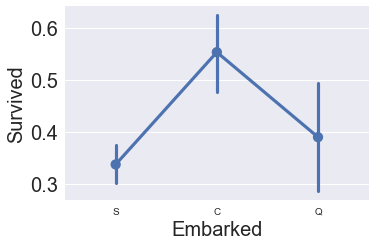

In [36]:
#팩터플랏
sns.factorplot('Embarked', 'Survived', data=data) ## 먼저 그래프를 그린 후
fig = plt.gcf() ## 현재 figure에 대해서
fig.set_size_inches(5, 3) ## figure 사이즈 설정
plt.show()

- Port C의 생존 확률이 0.55로 가장 높고, S가 가장 낮습니다.

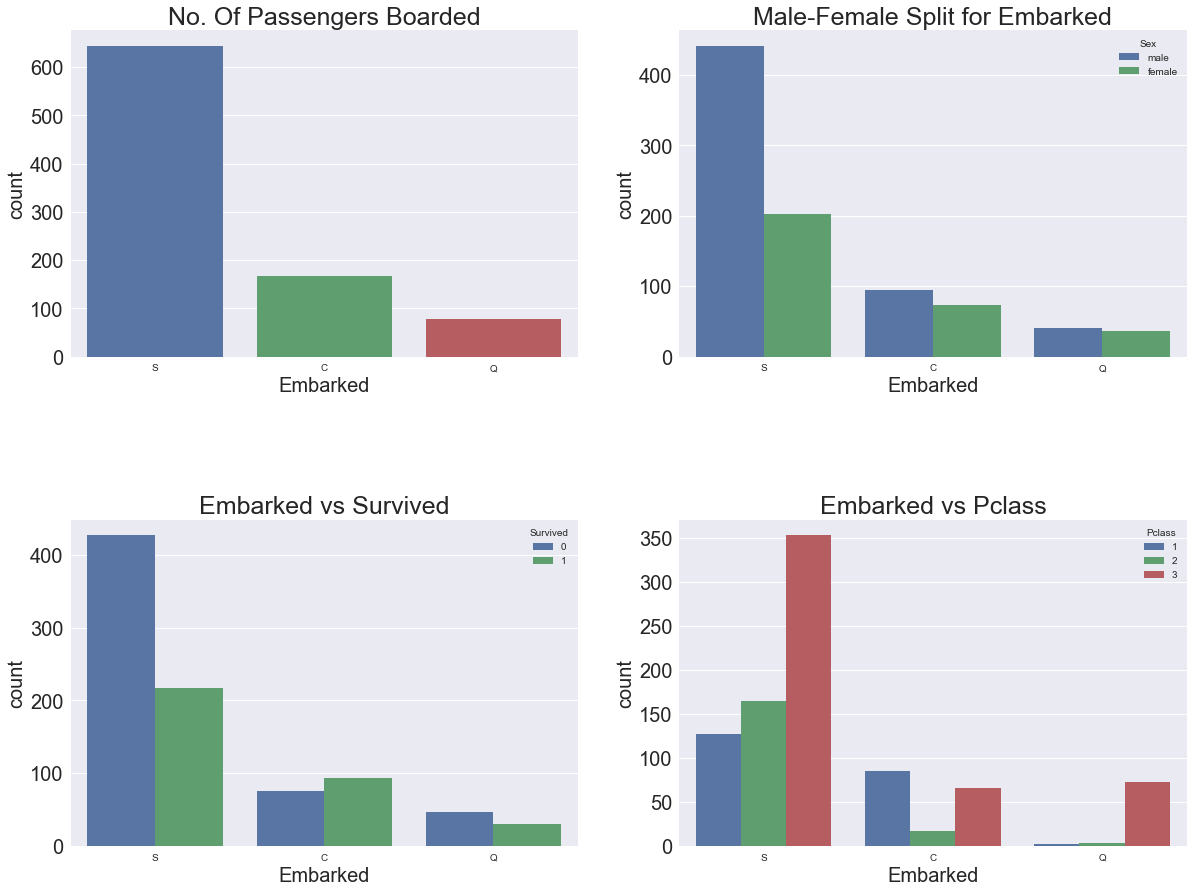

In [37]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

#카운트플랏

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Port S의 탑승객이 가장 많고, 대다수는 Pclass 3의 승객들입니다.
- Port C에 탑승한 사람들의 생존율이 높아 보이는데, 이는 Pclass 1과 Pclass 2의 승객들의 비율이 높기 때문인 것 같습니다.
- Port S에 대다수의 부유한 사람들이 탑승하였지만, 생존율이 낮은 이유는 Pclass 3의 비율이 매우 높기 때문입니다.
- Port Q의 95%는 Pclass 3의 승객입니다.

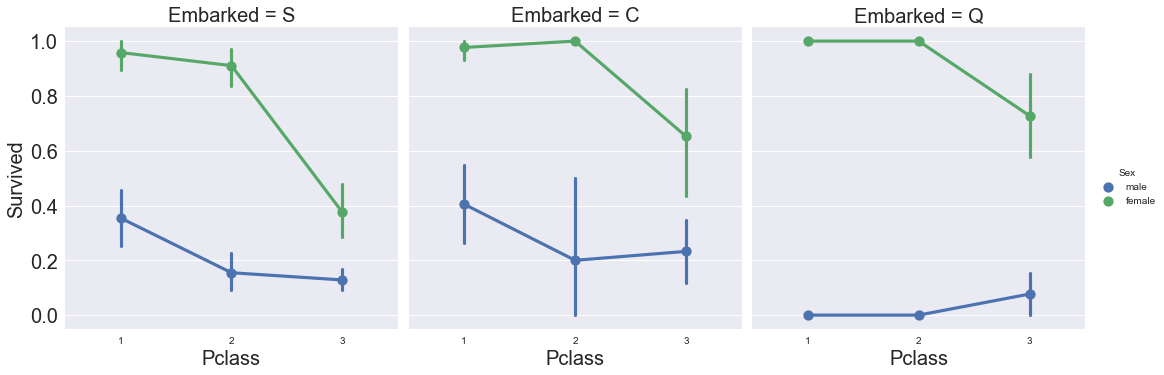

In [38]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Pclass 1과 2의 여자 탑승객의 생존율은 거의 1에 달합니다.
- Port S의 Pclass 3의 생존율이 낮습니다. (여자와 남자 모두 생존율이 낮습니다.)
- Port Q는 남자의 생존율이 매우 낮고, 그 중 대부분이 Pclass 3입니다.

### Embarked 결측값 채우기 
- 대다수의 승객들이 Port S에 탑승하였기에, 결측치를 S로 대체하겠습니다.

In [39]:
data['Embarked'].fillna('S', inplace=True)

In [40]:
# 결측값 존재 유무 확인
data.Embarked.isnull().any()

False

### SibSp: Discrete Feature (Bar/FactorPlot)
SibSp = 함께 탑승한 형제 또는 배우자의 수 <br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife

- 탑승한 형제 또는 배우자 수에 따른 생존 인원을 확인하고자 하였습니다.\
crosstab으로 정확한 수치를 확인하고, barblot으로 직관적으로 수치를 비교하고자 하였습니다.

In [41]:
pd.crosstab([data.SibSp],
            data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

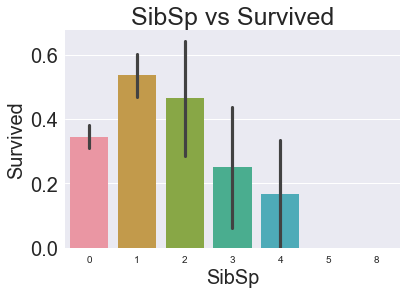

In [42]:
sns.barplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')

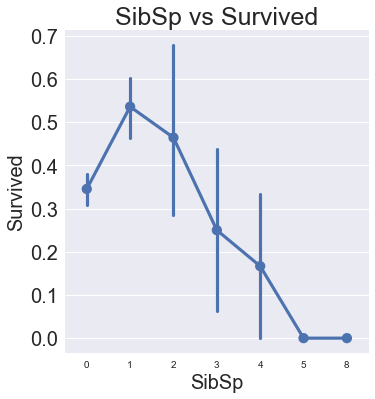

In [43]:
sns.factorplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')
plt.show()

In [44]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 만약 탑승객이 혼자거나 형제가 없다면, 34.5%의 생존율을 갖습니다.
- 형제의 수가 증가할수록 그래프 역시 떨어집니다.
- 놀랍게도 5-8명인 가족들의 생존율은 0%입니다.
- 그 이유를 __Pclass__에서 찾을 수 있습니다. crosstab을 보면 알 수 있듯이, SibSp > 3 은 모두 Pclass 3입니다.
- Pclass 3 이면서 4명 이상의 대가족들은 거의 생존하지 못한 것을 확인할 수 있습니다.
***

### Parch(Bar/FactorPlot)

- parch (= 함께 탑승한 부모, 자식의 수)에 따라 p-class 선택이 달라지는지 알아보고자합니다

In [14]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 대가족들은 Pclass 3에 많이 존재한다는 것을 다시 한번 알 수 있습니다.

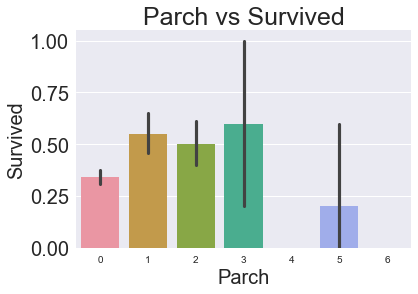

In [46]:
sns.barplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')
plt.show()

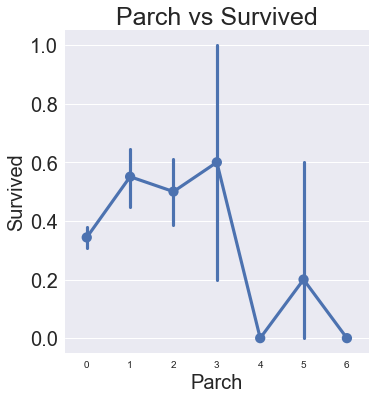

In [47]:
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
plt.title('Parch vs Survived')
plt.show()

- 부모ㆍ자녀와 함께 탑승한 승객들은 높은 생존율을 보여줍니다. 하지만 그 수가 증가할수록 생존율은 감소합니다.
- 1-3명의 부모ㆍ자녀와 탑승한 사람의 생존율이 가장 높습니다.
- 혼자 탑승할 때와 4명 이상의 부모ㆍ자녀와 탑승할 때 생존율은 감소하게 됩니다.
***

### Fare: Continuous Feature(Cat/DistPlot)

   1. Cat Plot :  숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여줄 수 있습니다.
   2. Dist Plot
        - matplotlib의 hist 그래프와 kdeplot을 통합한 그래프로,
        - 분포와 밀도를 확인할 수 있습니다.

In [48]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


- Lowest Fare가 0입니다. Free rider..

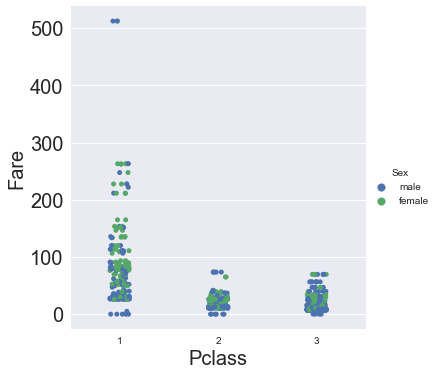

In [49]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

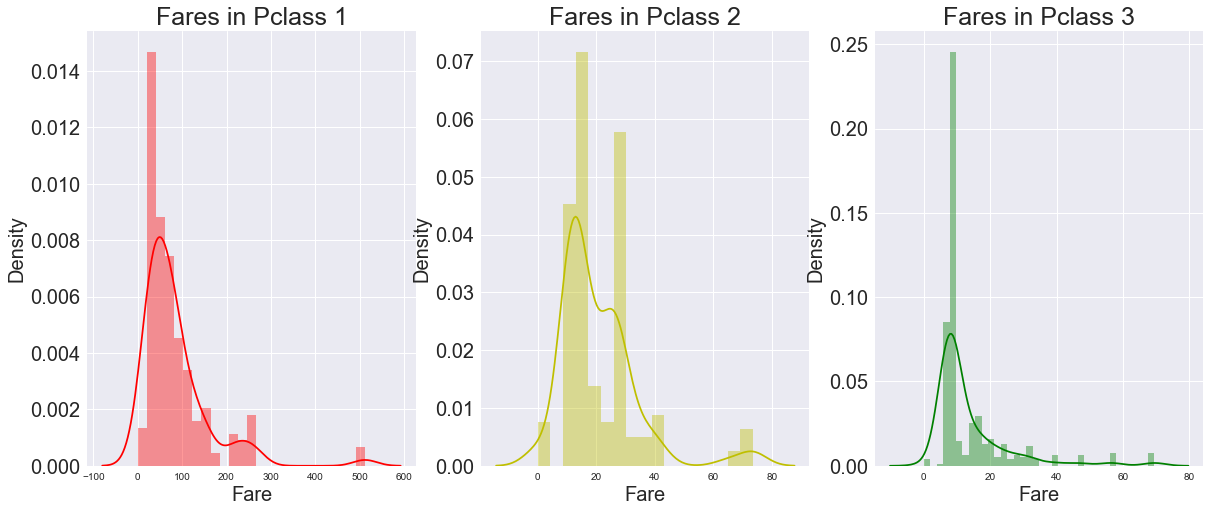

In [50]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# dist plot

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0], color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1], color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2], color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Observations in a Nutshell for all features:
__Sex__: 여자의 생존율이 남자보다 높습니다.

__Pclass__: 돈이 많을수록 생존율이 높습니다.

__Age__: 5-10살 아래의 아이들의 생존율이 높습니다. 15-35살의 탑승객들이 많이 죽었습니다.

__Embarked__: Pclass 1의 탑승객이 대부분 Port S에 탑승하였음에도, Port C에 탑승한 사람들의 생존율이 더 높습니다. Port Q의 탑승객은 모두 Pclass 3이다.

__Parch+SibSp__: 1-2명의 형제, 배우자 또는 1-3명의 부모ㆍ자녀와 탑승한 사람들의 생존율이 혼자 타거나 가족이 많은 사람들보다 생존율이 높습니다.
***

## Correlation Between The Features(heatmap)

1. heatmap
    - 구체적인 수치 없이도 많은 데이터가 시사하는 바를 패턴으로 나타내는 데 매우 효과적인 시각화 차트로,
    - 열분포 형태의 비쥬얼한 그래픽으로 출력합니다.
    
    - annot:셀에 수치 표시 True/False

- 아래는 각 변수들간의 상관관계를 heatmap으로 나타낸 것입니다.

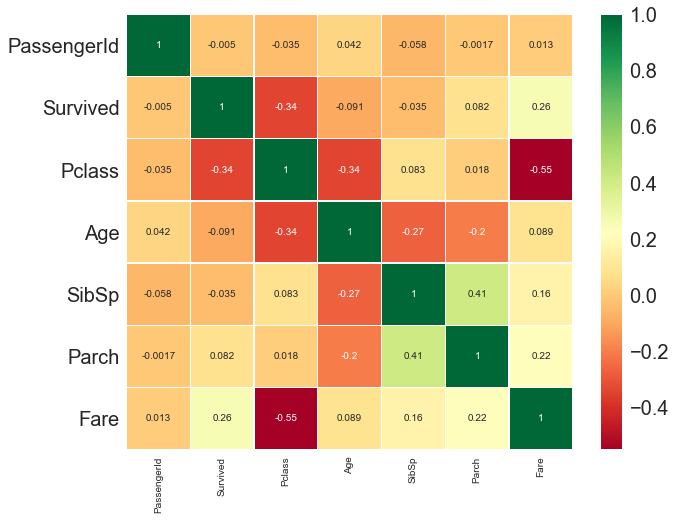

In [51]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #상관관계
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

__Interpreting the Heatmap__

- string이 아닌 numeric feature에 대해서만 correlation 분석이 가능합니다.
- 두 변수의 상관관계가 매우 높다는 것은 두 변수가 거의 동일한 정보를 갖고 있다는 것을 뜻합니다. 이를 다중공선성(Multicollinearity)이라고 합니다.
- 모델을 학습시킬 때, 다중공선성을 띠는 변수들 중 불필요한 변수들은 제거해야 합니다.
- 위 Heatmap에서는 그리 높은 상관관계가 존재하지 않는 것 같습니다. 가장 높은 상관계수는 __SibSp과 Parch(0.41)__ 입니다. 따라서 모든 feature들을 계속 들고 가도 될 것 같습니다.
***

# Feature Engineering & Data Cleaning

Feature Engineering이란, 초기 데이터로부터 특징을 가공하고 생산하여 모델의 입력 데이터를 생성하는 과정을 말합니다. 예시로 위에서 Name feature을 활용하여 Initials feature을 얻은 것을 생각하시면 됩니다. 모델의 성능에 Feature Engineering이 미치는 영향은 매우 크기 때문에 EDA에서 굉장히 중요한 부분입니다.
- 문자보다는 숫자, 개별값보다는 범위로 구분하도록 데이터를 가공하는 것이 좋습니다.
***

## Age_band 

__Problem With Age Feature:__   
__Age는 연속형 feature__입니다. 연속형 변수는 모델링 할 시 문제가 있습니다. 예를 들어, __Age__로 사람을 분류하고자 하나, 만약 30명의 사람이 있다면 30개의 개별 값들이 존재하는 문제가 생깁니다. 따라서 이러한 연속형 값을 __Binning 또는 Normalization__을 활용하여 범주형 값으로 바꾸는 것이 좋습니다. 저희는 binning을 통해 Age를 범주형 값으로 바꾸도록 하겠습니다.

탑승객의 Maximum age는 80이므로, 0-80을 5개의 범주로 나누면 사이즈가 16인 bin이 5개 생깁니다.

In [52]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [53]:
data['Age_band'].value_counts().to_frame().style.background_gradient(
    cmap='summer')  # 각각의 band의 탑승객 수 확인

,Age_band
1,382
2,325
0,104
3,69
4,11


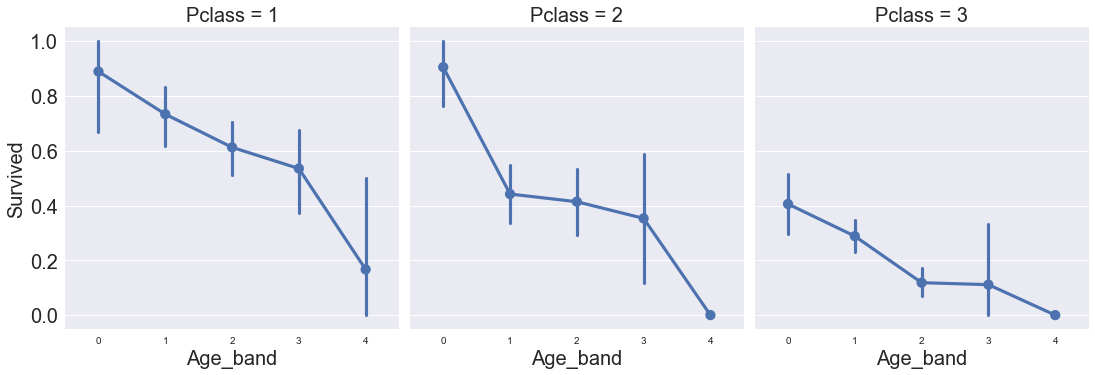

In [54]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

- Pclass와 상관없이 나이가 많을수록 생존율이 감소하는 것을 확인할 수 있습니다.
***

## Family_Size and Alone
Parch와 SibSp feature을 합쳐 __"Family_Size"__와 __"Alone"__이라는 새로운 feature을 만들어보고, 분석해보겠습니다.

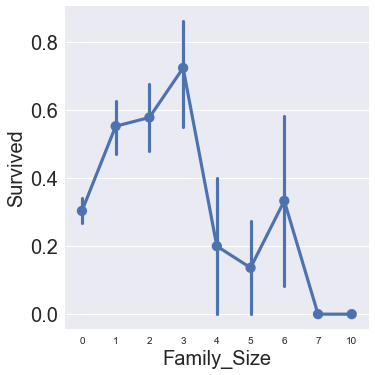

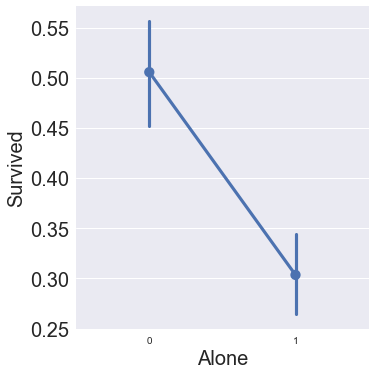

In [55]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']  #family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1  #Alone

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

- Family_Size = 0일 때, 탑승객은 alone입니다.
- alone 일 때 생존율이 매우 낮으며, family_size가 4 이상일 때도, 생존율은 감소합니다.
- 이는 모델링 시 중요한 feature가 될 것 같습니다.

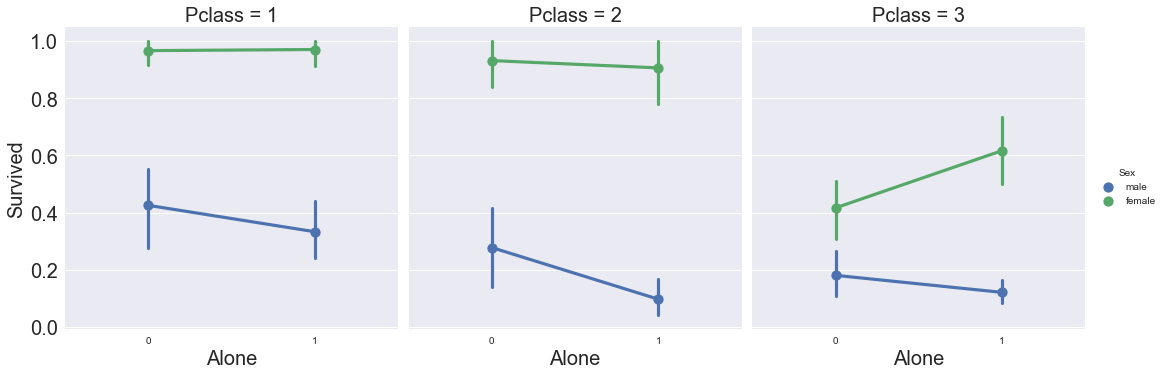

In [56]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

- alone인 것은 Sex와 Pclass 관계없이 매우 치명적입니다.
- 다만, 예외적으로 Pclass 3의 여자인 경우, 홀로 탑승할 때 더 높은 생존율은 보입니다.
***

## Fare_Range
- __Fare__ 역시 연속형 feature이므로, 이를 순서형 값으로 변환시키는 것이 좋습니다.
- __pandas.qcut__을 사용하여 변환시킬 수 있습니다.

In [57]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4) #네개로 나눠주겠다
data.groupby([
    'Fare_Range'
])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- __Fare_Range가 증가할수록, 생존율이 높아집니다.__
- Fare_Range 값을 __Age_Band__처럼 singleton 값으로 바꾸도록 하겠습니다.

In [58]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

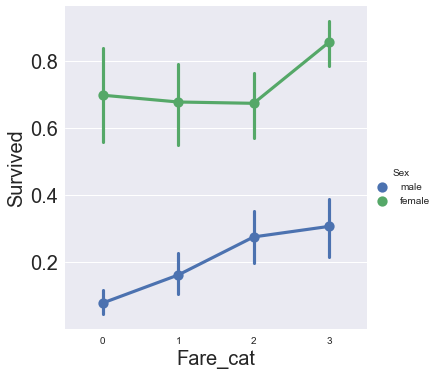

In [59]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

- Fare_cat이 증가할수록, 생존율 역시 증가합니다.
- 이 feature 역시 모델링 시 중요하게 사용될 것 같습니다.
***

## Converting String Values into Numeric
- string을 머신러닝 모델에 바로 사용할 수 없으므로 이를 numeric 값으로 변환해야 합니다.

In [60]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
                        [0, 1, 2, 3, 4],
                        inplace=True)

## Dropping UnNeeded Features 

In [61]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

Name--> 범주형 값으로 변환이 불가하기에, 불필요한 feature입니다.

Age--> Age_band feature가 있으므로, 불필요합니다.

Ticket--> 분류가 불가능한 random string이므로 사용할 수 없습니다.

Fare--> Fare_cat feature가 있으므로, 불필요합니다.

Cabin--> 많은 결측치가 존재하고, 다수의 탑승객들이 여러 개의 cabin 값을 동시에 가지므로 사용할 수 없는 불필요한 feature입니다.

Fare_Range--> Fare_cat feature가 있으므로, 불필요합니다.

PassengerId--> 분류가 불가능하여 사용할 수 없습니다.

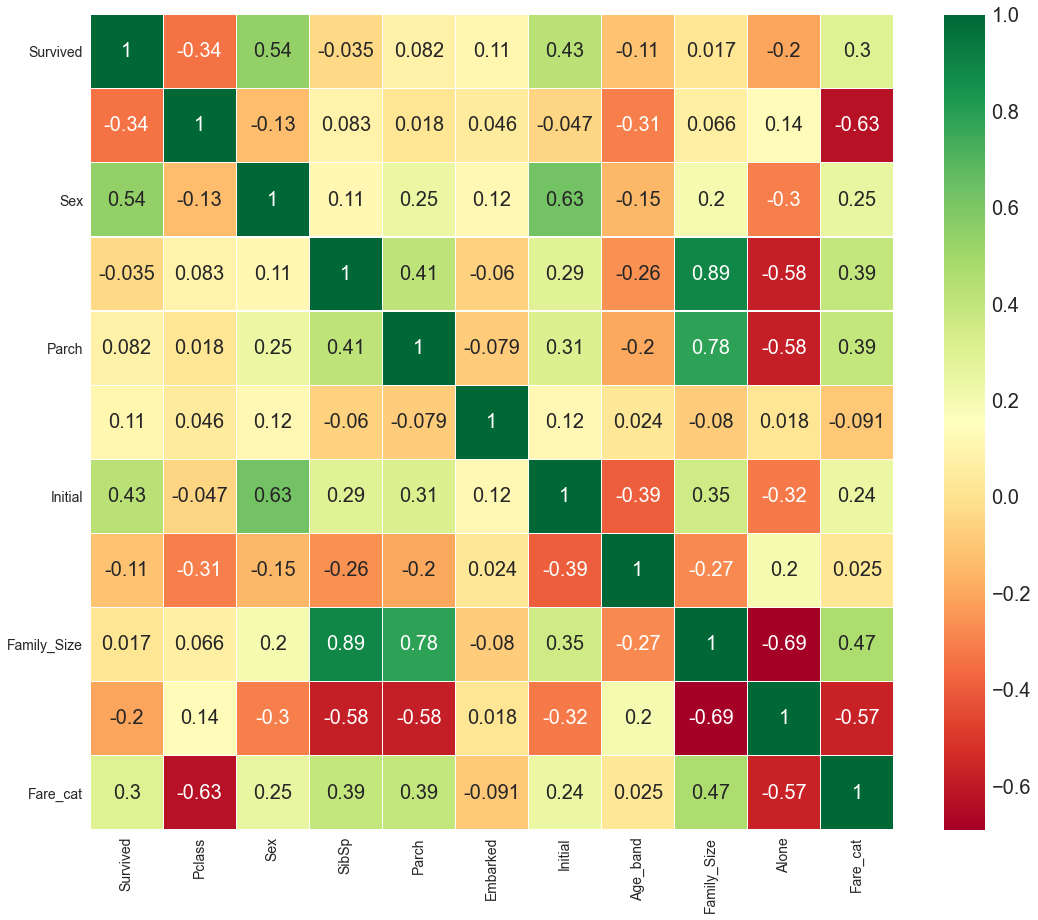

In [62]:
data.drop(
    ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
    axis=1,
    inplace=True)
sns.heatmap(data.corr(), ## data의 feature에서 correlation heatmap
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Positively related features: __SibSp와 Family_Size__, __Parch와 Family_Size__
- Negatively related features: __Alone과 Family_Size__
***

# 시각화 기본 보충

순서
1. Line Plot
2. Scatter Plot
3. Pair plot

## Line Plot 
- 연속적으로 변화하는 값을 순서대로 점으로 나타내고, 이를 선으로 연결한 그래프\
- 시간/순서에 대한 변화에 적합하여 추세를 살피기 위해 활용

In [63]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,0.661936,-0.746331,0.683134,0.260682
10,1.869362,-0.096261,0.652375,2.329857
20,2.618222,0.235473,0.491377,3.112883
30,2.581086,1.151640,-0.324016,3.528634
40,4.234569,-1.030684,-1.095768,2.554238
50,5.200880,-0.635647,0.383432,2.466363
60,6.454859,-0.433192,-0.248472,2.383157
70,5.992024,-0.030168,0.813192,1.877830
80,7.065546,0.358149,0.433114,2.098221
90,7.493415,0.511263,0.668814,2.201815


<AxesSubplot:>

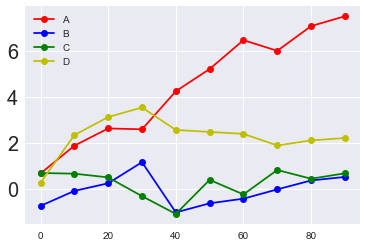

In [64]:
df.plot(marker='o', color=['r','b','g','y'])

## IRIS dataset

- 데이터명: IRIS (아이리스, 붓꽃 데이터)
- 레코드 수: 150개
- 필드 수: 5개 
    - sepal_length: 꽃받침 길이
    - sepal_width: 꽃받침 너비
    - petal_length: 꽃잎 길이
    - petal_width: 꽃잎 너비
    - species 꽃의 종류 setosa / versicolor / virginica

In [65]:
iris = sns.load_dataset("iris") #iris 데이터
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Scatter Plot 
-이름처럼 각각의 데이터 포인트들을 흩 뿌려놓은 (scatter)형태로,\
x축과 y축의 상관관계를 표현할 때 쓰입니다.

-크게 양의 상관관계 (한 변수가 증가할 때 나머지 변수도 같이 증가) 또는 음의 상관관계 (한 변수가 증가할 때 나머지 변수는 감소) 그리고 무상관 (두 변수 간 상관성이 없음)을 나타냅니다.

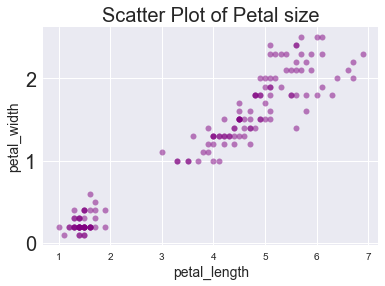

In [66]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris,
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)
plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.show()

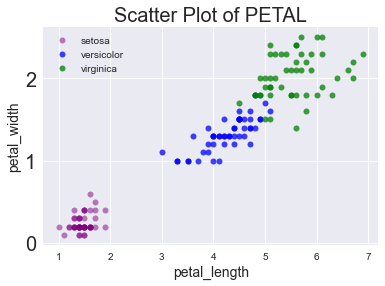

In [67]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='setosa'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='versicolor'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.75)
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='virginica'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='green', 
         alpha=0.75)
plt.title('Scatter Plot of PETAL', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

## Pair Plot
- 비교하려는 변수가 2개 이상일 때 유용함

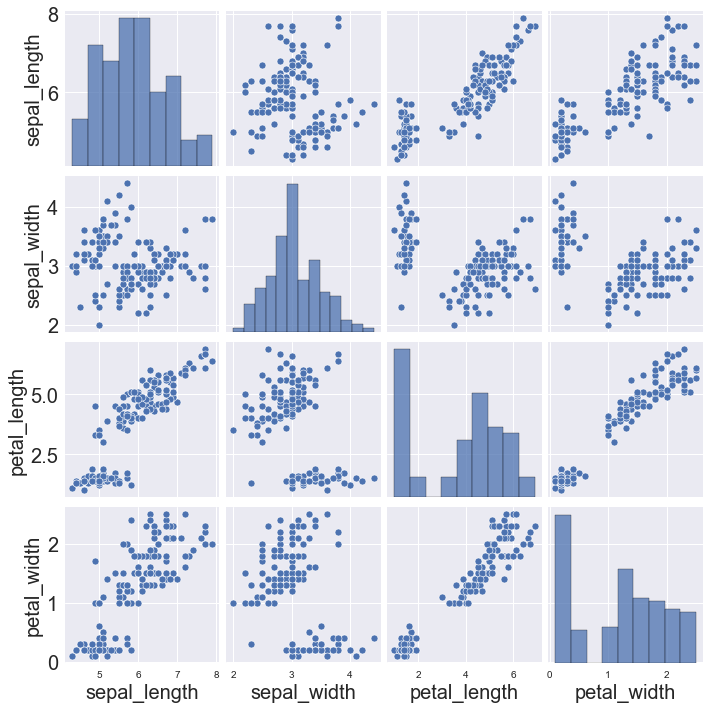

In [68]:
sns.pairplot(iris)

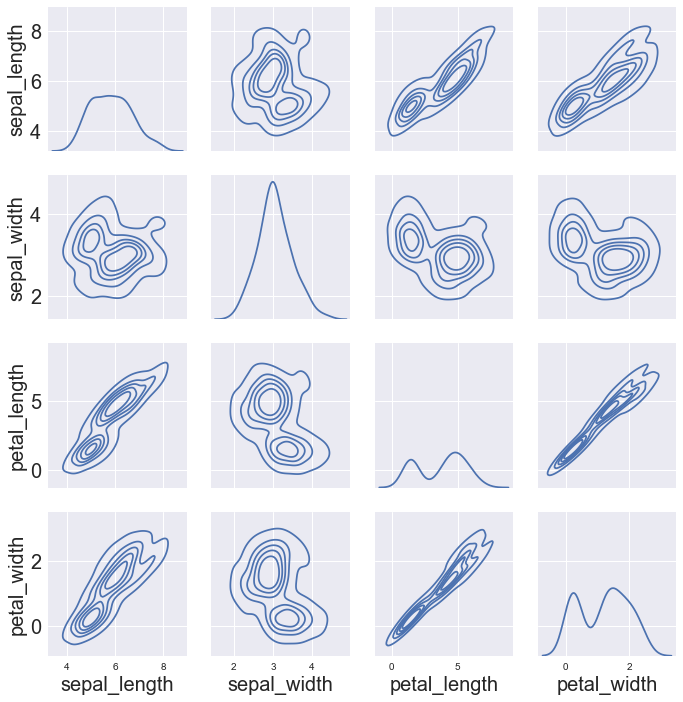

In [69]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# 실습

## 실습: 시각화 연습 

EDA 세션에서 사용한 titanic 데이터를 활용하여 세션 중 만들지 않았던 그래프 2개를 실습으로 그려보도록 하겠습니다.

1) 연속형 변수인 Fare를 bin이 5개의 빈으로 Fare_band를 생성하고, 그것을 활용할 수 있는 그래프를 그려보세요. 

2) Embarked 컬럼 내의 각 위치에서 내린 승객의 비율을 나타내는 PieChart와 Pclass 별 각각 살아남은 사람과 살아남지 못한 사람의 수를 나타내주는 Countplot을 함께 그려보세요.

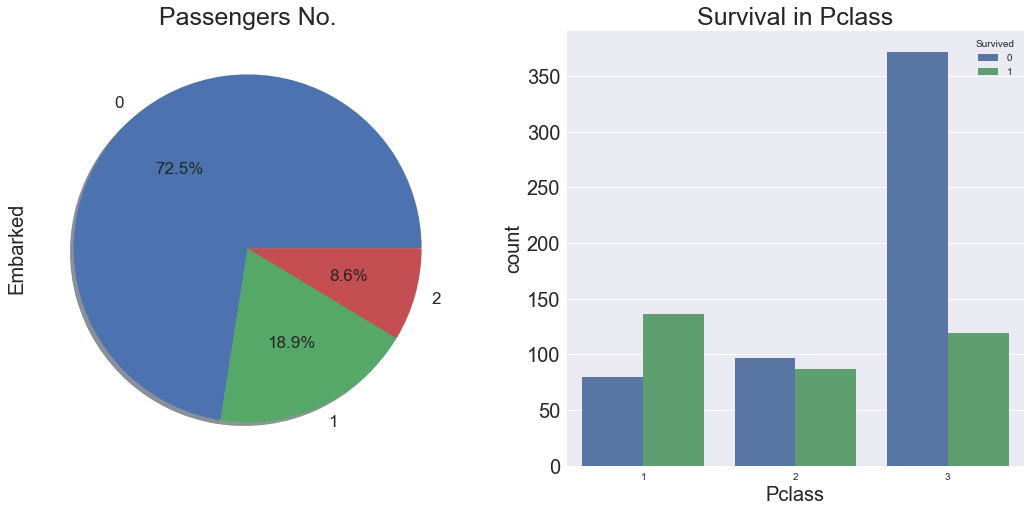

In [71]:
#예시
f, ax = plt.subplots(1,2, figsize=(18, 8))

data['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True,
                                         fontsize=17)
ax[0].set_title('Passengers No.')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1]) 
ax[1].set_title('Survival in Pclass')


plt.show()

3) 성별 별로 Embarked에 따른 Survived의 변화를 factorplot을 통해 나타내보세요.

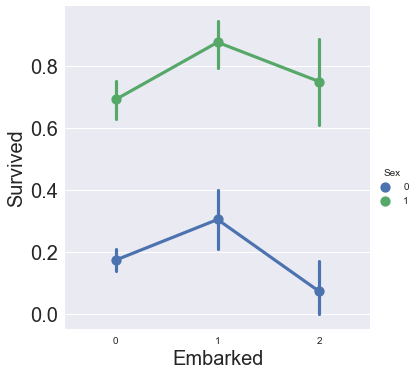

In [72]:
#예시
sns.factorplot('Embarked', 'Survived', hue='Sex', data=data) ## sex별로 Embarked의 변화에 따른 survived 변화
plt.show()

## 과제2: 클론코딩 1회

오늘 배운 코드 전체를 __똑같이 1번 더 따라 적는 것이 과제__입니다. __꼭 복붙하지 않고 직접 타이핑해 주세요!__ 타이핑한 ipynb 파일을 업로드해주시면 됩니다.

만약 개인적으로 EDA를 더욱 공부해보고 싶다면, 아래 링크의 Notebook들을 동일한 방법으로 필사해보는 것을 추천드립니다.
***

## Binary Classification - Tabular data
- [Porto](https://www.kaggle.com/bertcarremans/data-preparation-exploration)
- [Home credit](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)
***
## Multi-class Classification - Tabular data
- [Costa-rican](https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough)
***
## Binary Classification - Image Classification
- [Statoil](https://www.kaggle.com/devm2024/keras-model-for-beginners-0-210-on-lb-eda-r-d)
***
## Multi-class Classification - Image Classification
- [Fruits 360](https://www.kaggle.com/amadeus1996/fruits-360-transfer-learning-using-keras)
***
## Audio Recognition
- [Tensorflow](https://www.kaggle.com/davids1992/speech-representation-and-data-exploration)
***
## Regression - Tabular data
- [New-York taxi](https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367)
- [Zillow](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize)
***
## Object Segmentation
- [Data bowl 2018](https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies)
***
## Natural Language Processing - Classification, Regression
- [Spooky](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)
- [Mercari](https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling)
- [Toxic](https://www.kaggle.com/sbongo/for-beginners-tackling-toxic-using-keras)
***
## Other dataset - Anomaly Detection, Visualization
- [Credit card](https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now)
- [Kaggle survey](https://www.kaggle.com/ash316/novice-to-grandmaster)
***